In [45]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numdifftools as nd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [46]:
!pip install numdifftools

In [47]:
import pandas as pd
import numpy as np
import random

In [48]:
random.seed(10)
a = np.random.randint(0, 10, size=(10, 10))
b=np.random.randint(0, 10, size=(10, 10))

In [49]:
a

array([[1, 9, 6, 0, 6, 3, 9, 4, 2, 4],
       [1, 1, 5, 1, 5, 0, 4, 6, 9, 0],
       [2, 3, 1, 4, 1, 8, 0, 0, 1, 8],
       [5, 5, 3, 2, 6, 7, 4, 9, 0, 7],
       [7, 0, 0, 4, 6, 4, 5, 2, 7, 8],
       [3, 1, 4, 0, 9, 7, 3, 9, 9, 6],
       [3, 3, 2, 2, 7, 5, 9, 7, 0, 2],
       [2, 5, 4, 2, 3, 6, 6, 8, 6, 0],
       [0, 8, 5, 8, 4, 3, 0, 7, 6, 2],
       [0, 9, 4, 9, 6, 7, 6, 1, 0, 6]])

In [50]:
c=np.linalg.inv(a)

In [51]:
c

array([[-0.32571271,  0.07327769, -0.83046347,  0.72302801,  0.16200517,
         0.02515415, -0.97761385,  0.51078242, -0.60045472,  0.76575557],
       [ 0.10397828, -0.25685859, -0.1637896 , -0.02043656,  0.07439567,
         0.07770933, -0.12527769,  0.10228885,  0.07227893,  0.01367263],
       [-0.2900892 ,  0.45037479, -0.43300645,  0.62582082, -0.07705658,
        -0.0725267 , -0.73263865,  0.26575764, -0.57376629,  0.65134755],
       [-0.07001377,  0.10848218,  0.10381778, -0.03189141, -0.00473004,
        -0.10061971,  0.13176236, -0.07348228,  0.07324193, -0.01594955],
       [-0.14761088, -0.1017861 , -0.53431436,  0.25219491,  0.05698619,
         0.21390714, -0.4362848 ,  0.16264041, -0.25904985,  0.4584885 ],
       [-0.16701508, -0.03458014, -0.26675813,  0.19885693, -0.01125774,
         0.11175844, -0.35899536,  0.2806709 , -0.28317293,  0.35232913],
       [ 0.16964385,  0.04198046,  0.42733015, -0.33048676, -0.02584892,
        -0.12710396,  0.51625749, -0.20018449

In [52]:
d= a.T

In [53]:
e=a.dot(d)
e

array([[280, 148,  99, 225, 154, 216, 216, 205, 183, 244],
       [148, 186,  28, 127, 136, 216, 131, 170, 157,  98],
       [ 99,  28, 160, 154, 139, 135,  88,  88, 111, 177],
       [225, 127, 154, 294, 201, 270, 230, 207, 193, 235],
       [154, 136, 139, 201, 259, 247, 166, 152, 140, 180],
       [216, 216, 135, 270, 247, 363, 220, 240, 214, 191],
       [216, 131,  88, 230, 166, 220, 234, 194, 146, 203],
       [205, 170,  88, 207, 152, 240, 194, 230, 198, 183],
       [183, 157, 111, 193, 140, 214, 146, 198, 267, 228],
       [244,  98, 177, 235, 180, 191, 203, 183, 228, 336]])

In [54]:
from numpy.linalg import eig
# calculate eigendecomposition
values, vectors = eig(a)
print(values)
print(vectors)

[42.20560402+0.j          9.28652422+0.j          8.15000611+0.j
 -6.27896074+2.4552612j  -6.27896074-2.4552612j  -1.83588303+4.50339606j
 -1.83588303-4.50339606j  2.19276881+3.47866733j  2.19276881-3.47866733j
 -0.79798444+0.j        ]
[[ 0.30495652+0.j          0.14080077+0.j         -0.05110366+0.j
   0.17338977-0.00740003j  0.17338977+0.00740003j -0.53377882+0.j
  -0.53377882-0.j          0.14651539+0.16047755j  0.14651539-0.16047755j
  -0.52570506+0.j        ]
 [ 0.22577122+0.j         -0.2810723 +0.j          0.23755121+0.j
  -0.03396143+0.31794478j -0.03396143-0.31794478j -0.09901983-0.35972881j
  -0.09901983+0.35972881j  0.30149174+0.14732563j  0.30149174-0.14732563j
   0.01116295+0.j        ]
 [ 0.22753643+0.j          0.33310118+0.j         -0.51039249+0.j
  -0.24307379-0.25747486j -0.24307379+0.25747486j -0.02868413+0.19993851j
  -0.02868413-0.19993851j -0.38641404-0.03537055j -0.38641404+0.03537055j
  -0.40555267+0.j        ]
 [ 0.36170592+0.j          0.10265909+0.j       

In [55]:
from sympy import Matrix
from sympy.abc import x, y
X = Matrix([8*x, 6*y, 3, 7*(y)**5, 0, 9*(x)**4, 7*x, 1*y, 6, 1*(y)**4])
Y = Matrix([x, y])
X.jacobian(Y)

Matrix([
[      8,       0],
[      0,       6],
[      0,       0],
[      0, 35*y**4],
[      0,       0],
[36*x**3,       0],
[      7,       0],
[      0,       1],
[      0,       0],
[      0,  4*y**3]])

In [56]:
import numpy as np

def hessian(x):

    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian
hessian(a)

array([[[[  0,   5,  -1,   1,  -1,   5,   0,  -4,  -7,   6],
         [  1,   5,   0,   0,   0,   3,   2,   0,  -5,   3],
         [  1,   0,   1,  -1,   2,  -2,   3,   1,   1,  -1],
         [ -1,  -2,   0,   0,   0,  -1,   0,   0,   4,  -2],
         [ -2,   1,   0,   0,  -1,   1,   0,   0,  -3,  -1],
         [  0,   2,   0,   1,  -2,   0,   1,   0,  -3,  -1],
         [  0,   0,   0,   2,  -1,   0,  -3,  -1,   3,   1],
         [  0,   0,   0,   1,   2,   0,   0,  -1,   0,   3],
         [  0,   0,  -1,  -1,   1,   2,   5,  -3,  -4,   2],
         [  1,  -1,  -1,  -2,   0,   3,   6,  -2,  -3,   1]],

        [[ -8,   0,   4,   0,  -2,  -2,   2,   6,  -3, -11],
         [ -3,  -1,   2,   0,   0,  -1,  -2,   2,   2,   2],
         [  0,  -1,   0,   0,   1,   0,  -1,  -2,   1,   8],
         [ -4,  -1,   0,   1,  -1,   0,   1,   0,   0,  -3],
         [ -1,   0,   0,   0,   0,  -1,   0,   2,   0,  -5],
         [  3,   1,  -1,   0,   0,   0,   1,  -2,  -2,   0],
         [  2,   0,   

In [57]:
data=pd.read_csv("/content/drive/My Drive/diabetes_data.csv")
data.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [58]:
x=['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity','class']


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
for i in x:
  data[i]=le.fit_transform(data[i])



In [61]:
#normalise age feature
normalize=(data.iloc[:,1]-data.iloc[:,1].mean())/data.iloc[:,1].std()
data.insert(1, 'age normalize', normalize)
data.head()


,Age,age normalize,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0.764356,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0.764356,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,0.764356,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0.764356,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,0.764356,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [62]:
X = data.drop(["class"],axis=1)
y = data["class"]


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.15)

In [77]:
def predict(X, weights):
    '''Predict class for X.
    For the given dataset, predicted vector has only values 0/1
    Args:
        X : Numpy array (num_samples, num_features)
        weights : Model weights for logistic regression
    Returns:
        Binary predictions : (num_samples,)
    '''

    ### START CODE HERE ###
    z = np.dot(X, weights)
    #logits = 
    y_pred = sigmoid(z)
    ### END CODE HERE ###
    
    return y_pred

In [76]:
def sigmoid(z):
        '''Sigmoid function: f:R->(0,1)
        Args:
            z : A numpy array (num_samples,)
        Returns:
            A numpy array where sigmoid function applied to every element
        '''
        ### START CODE HERE
        sig_z = 1 / (1 + np.exp(-z))
        ### END CODE HERE
        
        assert (z.shape==sig_z.shape), 'Error in sigmoid implementation. Check carefully'
        return sig_z

In [75]:
def cross_entropy_loss(y_true, y_pred):
    '''Calculate cross entropy loss
    Note: Cross entropy is defined for multiple classes/labels as well
    but for this dataset we only need binary cross entropy loss
    Args:
        y_true : Numpy array of true values (0/1) of size (num_samples,)
        y_pred : Numpy array of predicted values (probabilites) of size (num_samples,)
    Returns:
        Cross entropy loss: A scalar value
    '''
    # Fix 0 values in y_pred
    y_pred = np.maximum(np.full(y_pred.shape, 1e-7), np.minimum(np.full(y_pred.shape, 1-1e-7), y_pred))
    
    ### START CODE HERE
    ce_loss = ((y_true*np.log(y_pred) + (1-y_true)*np.log(1-y_pred)).mean())
    ### END CODE HERE
    
    return ce_loss

In [74]:
def newton_optimization(X, y, max_iterations=25):
    '''Implement netwon method for optimizing weights
    Args:
        X : Numpy array (num_samples, num_features)
        max_iterations : Max iterations to update the weights
    Returns:
        Optimal weights (num_features,)
    '''
    num_samples = X.shape[0]
    num_features = X.shape[1]
    # Initialize random weights
    weights = np.zeros(num_features,)
    # Initialize losses
    losses = []
    
    # Newton Method
    for i in range(max_iterations):
        # Predict/Calculate probabilties using sigmoid function
        y_p = predict(X, weights)
        
        # Define gradient for J (cost function) i.e. cross entropy loss
        gradient = (1/(num_samples))*np.dot(X.transpose(), ( y_p - y ))
        
        # Define hessian matrix for cross entropy loss
        #hessian =(np.dot(np.dot(y_p,1-y_p),np.dot(X,np.transpose(X)))).mean()
        hessian=1/(num_samples)* X.T.dot(np.diag(y_p).dot(np.diag(1-y_p)).dot(X))
        nh =np.linalg.inv(hessian)
        # Update the model using hessian matrix and gradient computed
        
        weights= weights - np.dot(nh, gradient)
        
        # Calculate cross entropy loss
        loss = cross_entropy_loss(y, y_p)
        # Append it
        losses.append(loss)

    return weights, losses

In [71]:
# Train weights
weights, losses = newton_optimization(X_train, y_train)

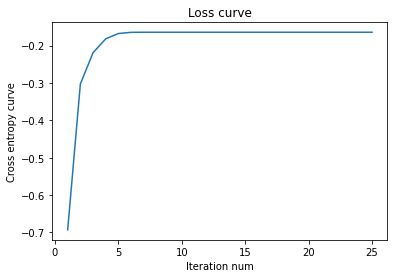

In [72]:
# Plot the loss curve
plt.plot([i+1 for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Cross entropy curve")
plt.show()

In [80]:
our_model_test_acuracy = accuracy_score(y_test, predict(X_test, weights).round())

print(f"\nAccuracy in testing set by our model: {our_model_test_acuracy}")


Accuracy in testing set by our model: 0.8717948717948718


Compare with the scikit learn implementation


In [81]:
model = LogisticRegression(solver='newton-cg', verbose=1)

In [82]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=1,
                   warm_start=False)

In [83]:
y_pred = model.predict(X_test)

In [84]:
sklearn_test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy in testing set by sklearn model: {sklearn_test_accuracy}")


Accuracy in testing set by sklearn model: 0.9230769230769231
